## Name: Jose Aries E. De Los Santos
## DS397 Machine Problem 2 2a

# PROBLEM 2: Fisher Iris Flower Data Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

##  **Load Dataset**

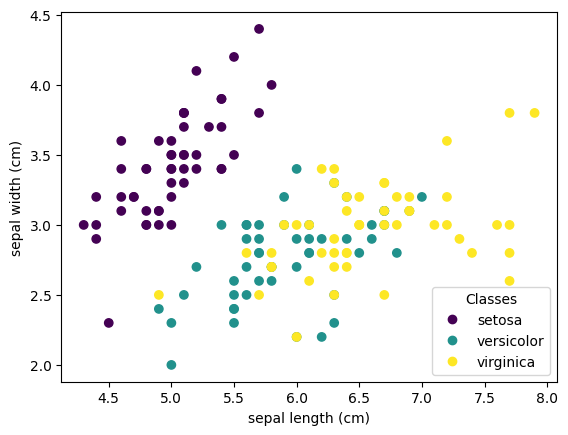

In [ ]:
from sklearn.datasets import load_iris
from sklearn import datasets

iris = datasets.load_iris()
# iris = load_iris(as_frame=True)

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

## Extract the Features and Target

In [ ]:
# Create a DataFrame from the features and target
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target  # Add target variable to DataFrame

X = iris_df.iloc[:,[0,2]].to_numpy()
y = iris.target
iris_df[['sepal length (cm)', 'petal length (cm)', 'target']]

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## Split the data

Using the train_test_split function, split the data into 70% training and 30% testing, with stratification on the species

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

##Checking the dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(105, 2)
(105,)
(45, 2)
(45,)


## Normalize the data using Standard Scaling

In [ ]:
## For this we only need to normalized the features data
scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_train_scaled.shape == X_train.shape)
print(X_test_scaled.shape == X_test.shape)

(105, 2)
(45, 2)
True
True


## 2a Multiclassifcation Neural Network

### Create MultiClass MLP

In [ ]:
class MulticlassMLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases for the hidden layer and output layer
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def softmax(self, x):
        exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def softmax_derivative(self, x):
        return x * (1 - x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        # Forward propagation
        self.hidden_input = np.dot(inputs, self.weights_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.output_layer_input = np.dot(self.hidden_output, self.weights_output) + self.bias_output
        self.output = self.softmax(self.output_layer_input)
        return self.output

    def backward(self, inputs, targets, learning_rate):
        batch_loss = 0

        for i in range(len(inputs)):
            # One-hot encode the target class
            input_data = np.array([inputs[i,:]])
            target_data = np.zeros((1,np.max(targets)+1))
            target_data[0,targets[i]] = 1

            # Forward pass
            self.forward(input_data)

            # Backward pass
            output_error = self.output - target_data
            hidden_error = output_error.dot(self.weights_output.T) * self.softmax_derivative(self.hidden_output)

            # Update weights and biases using gradient descent
            self.weights_output -= learning_rate * self.hidden_output.T.dot(output_error)
            self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
            self.weights_hidden -= learning_rate * input_data.T.dot(hidden_error)
            self.bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)

            # Add to the batch loss function
            batch_loss += self.cross_entropy_loss(target_data, self.output)

        return batch_loss / len(inputs)

    def plot_decision(self, X, y):
        nx, ny = 80, 80
        xv, yv = np.meshgrid(np.linspace(-3,3,nx),
                             np.linspace(-3,3,ny))

        xv, yv = xv.reshape(-1,1), yv.reshape(-1,1)
        grid = np.hstack((xv,yv))
        zv = np.zeros(grid.shape[0])
        color = ['C0','C1','C2']
        for i in range(grid.shape[0]):
            zv[i] = mlp.predict(grid[i,:])
        for i in range(3):
            plt.scatter(xv[zv == i],yv[zv == i], color=color[i], alpha=0.2, s=4)
            plt.scatter(X[y == i,0],X[y == i,1], color=color[i], edgecolor='k')
        plt.show()

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            # Backpropagation algorithm
            batch_loss = self.backward(inputs, targets, learning_rate)

            # Print the loss for every 1000 epochs
            if (epoch+1) % 100 == 0 or epoch == 0:
                print(f'Epoch {epoch+1}, Training Loss: {batch_loss}')
                self.plot_decision(inputs, targets)

    def cross_entropy_loss(self, y_true, y_pred):
        # Compute cross-entropy loss
        loss = -np.sum(y_true * np.log(y_pred + 1e-15)) / len(y_true)
        return loss

    def predict(self, inputs):
        # Make predictions using the trained model
        return np.argmax(self.forward(inputs), axis=1)

### First Trial

Epoch 1, Training Loss: 2.211161560871873


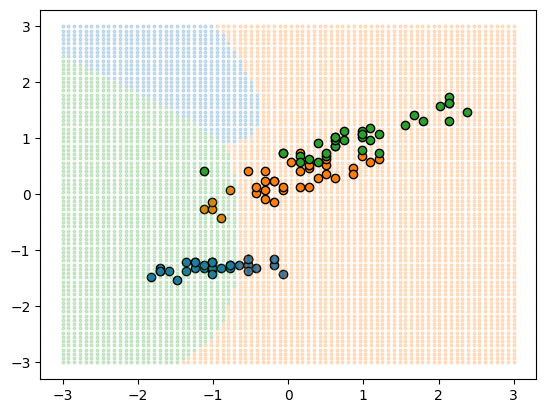

Epoch 100, Training Loss: 0.20546115462265255


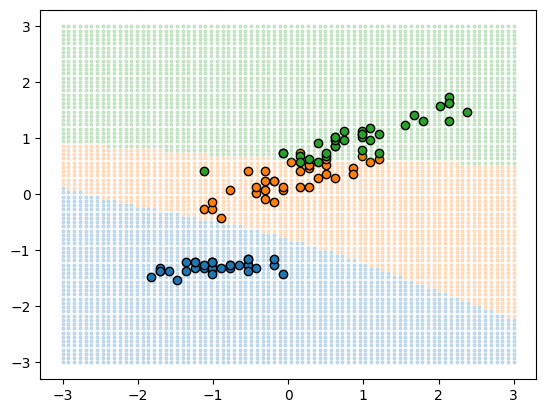

Epoch 200, Training Loss: 0.13999519935584342


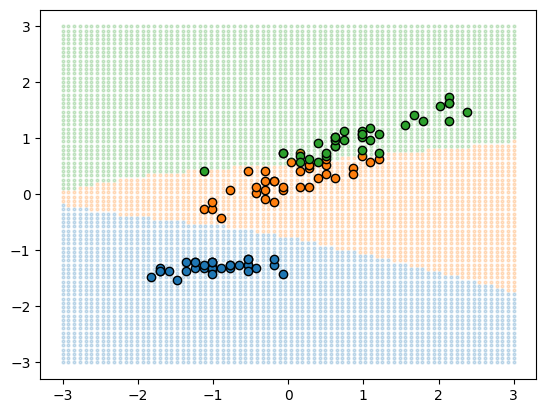

Epoch 300, Training Loss: 0.12165050417816833


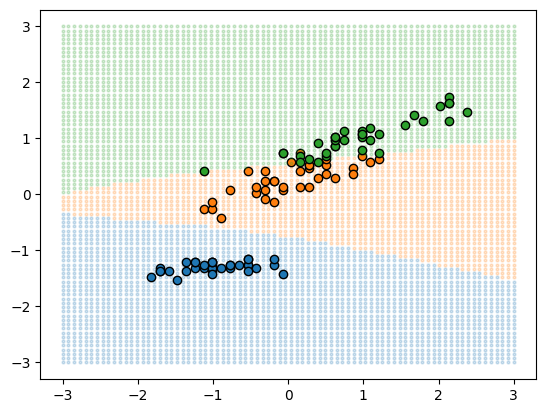

Epoch 400, Training Loss: 0.11430400423273254


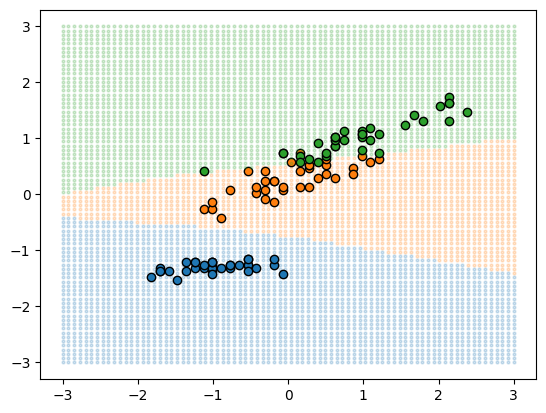

Epoch 500, Training Loss: 0.11054067132823027


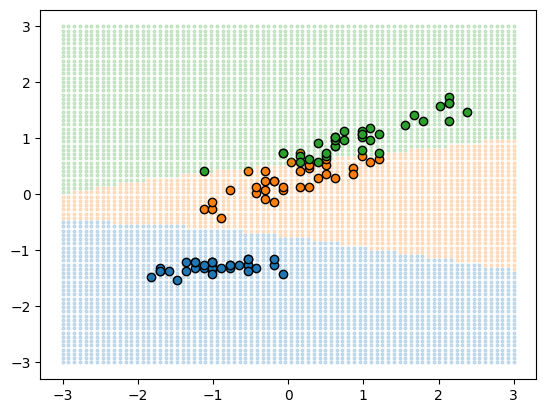

Epoch 600, Training Loss: 0.10825337513369959


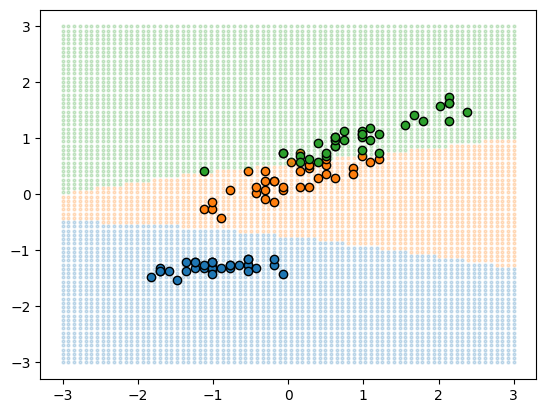

Epoch 700, Training Loss: 0.10665606083369729


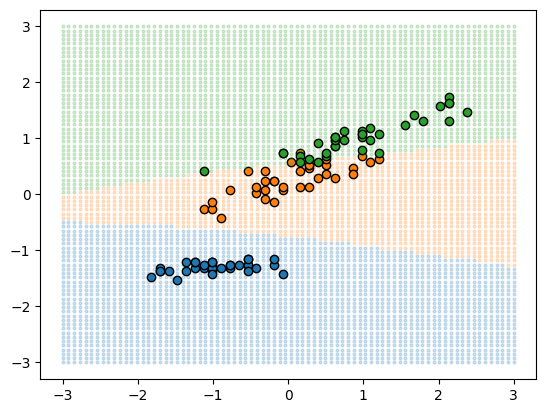

Epoch 800, Training Loss: 0.1054016600041728


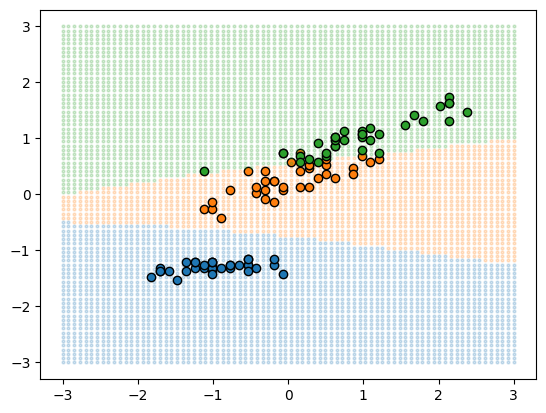

Epoch 900, Training Loss: 0.10432416017120794


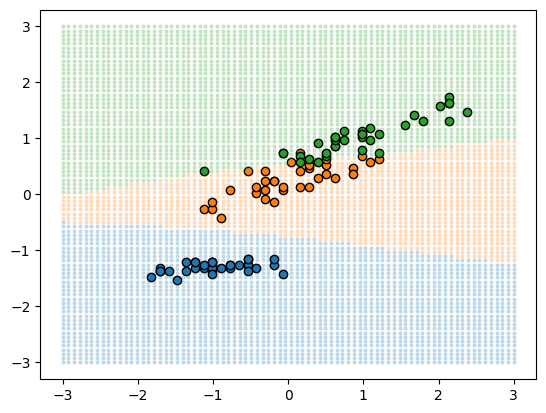

Epoch 1000, Training Loss: 0.10334717757699896


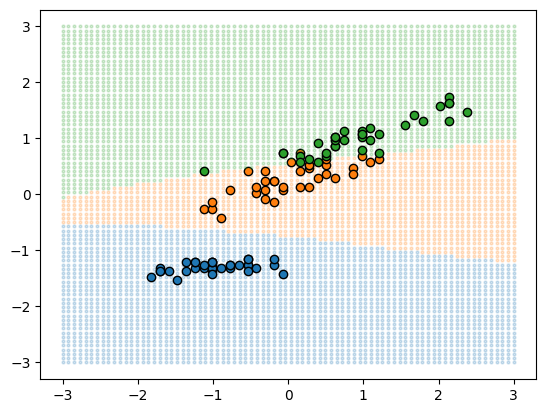

Epoch 1100, Training Loss: 0.10244405858327998


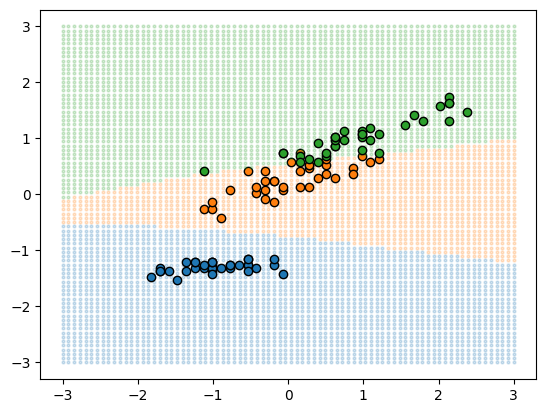

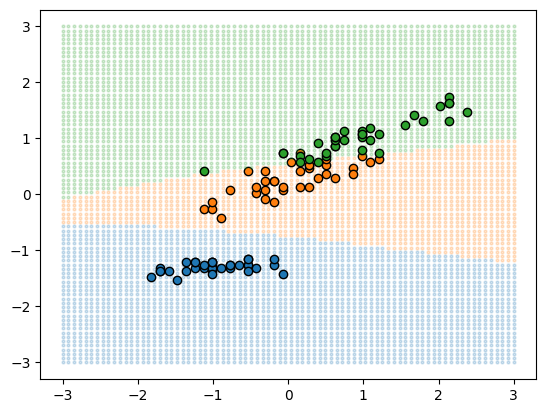

In [ ]:
#First Trial
# Define your input, target, and parameters
input_size = 2
hidden_size = 12
output_size = 3
learning_rate = 0.01
epochs = 1100

# Create an instance of BinaryClassifierMLP
mlp = MulticlassMLP(input_size, hidden_size, output_size)

# Train the binary classifier
mlp.train(X_train_scaled, y_train, epochs, learning_rate)

mlp.plot_decision(X_train_scaled, y_train)

#### First Trial Metric

In [ ]:
y_train_pred = np.zeros(y_train.shape)
conf_matrix_train = np.zeros((np.max(y_train)+1,np.max(y_train)+1))
for i in range(len(y_train)):
    y_train_pred[i] = mlp.predict(X_train_scaled[i,:])
    conf_matrix_train[int(y_train_pred[i]),int(y_train[i])] += 1

print("Confusion Matrix Training (Predicted vs. Actual)")
print(conf_matrix_train)

acc_train = np.trace(conf_matrix_train)/len(X_train_scaled)
print(f'Training Accuracy: {acc_train}')

print("==="*1000)

y_test_pred = np.zeros(y_test.shape)
conf_matrix_test = np.zeros((np.max(y_test)+1,np.max(y_test)+1))
for i in range(len(y_test)):
    y_test_pred[i] = mlp.predict(X_test_scaled[i,:])
    conf_matrix_test[int(y_test_pred[i]),int(y_test[i])] += 1

print("Confusion Matrix Testing (Predicted vs. Actual)")
print(conf_matrix_test)

acc_test = np.trace(conf_matrix_test)/len(X_test_scaled)
print(f'Testing Accuracy: {acc_test}')

Confusion Matrix Training (Predicted vs. Actual)
[[35.  0.  0.]
 [ 0. 33.  2.]
 [ 0.  2. 33.]]
Training Accuracy: 0.9619047619047619
Confusion Matrix Testing (Predicted vs. Actual)
[[15.  0.  0.]
 [ 0. 15.  1.]
 [ 0.  0. 14.]]
Testing Accuracy: 0.9777777777777777


### 2nd Trial

Epoch 1, Training Loss: 1.6965971420430346


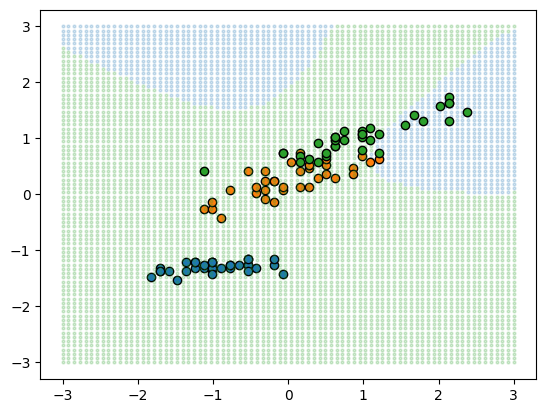

Epoch 100, Training Loss: 0.7644211663655734


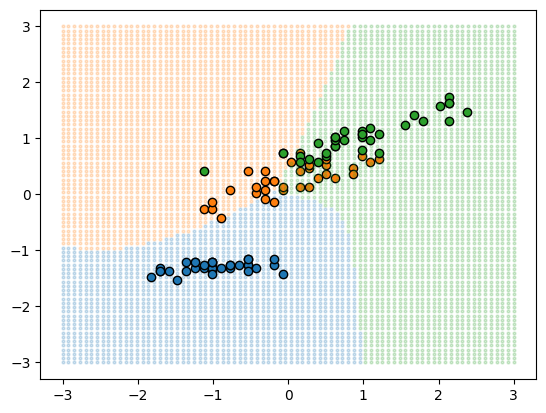

Epoch 200, Training Loss: 0.604654411995055


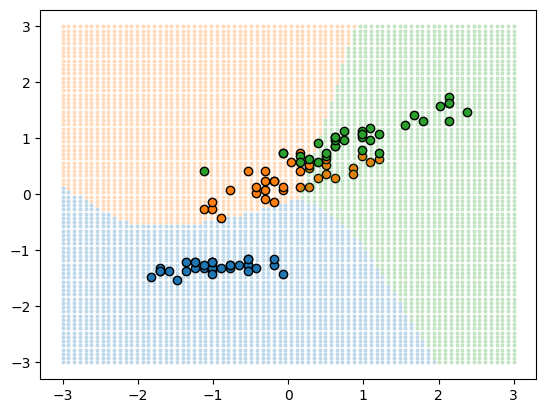

Epoch 300, Training Loss: 0.5385424726320892


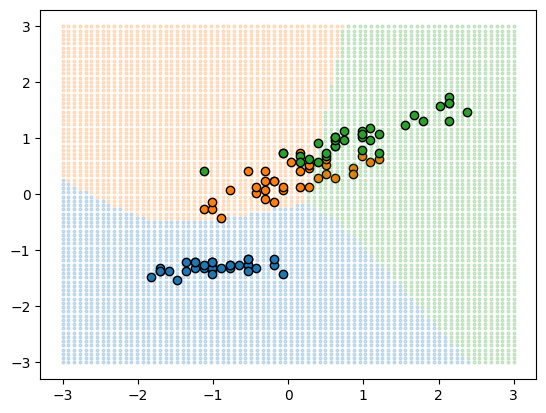

Epoch 400, Training Loss: 0.49905780500367203


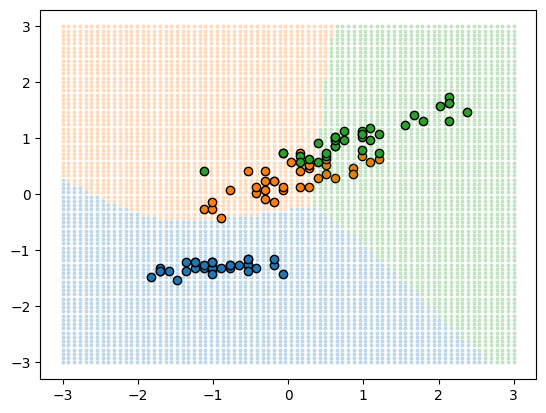

Epoch 500, Training Loss: 0.4716735549131624


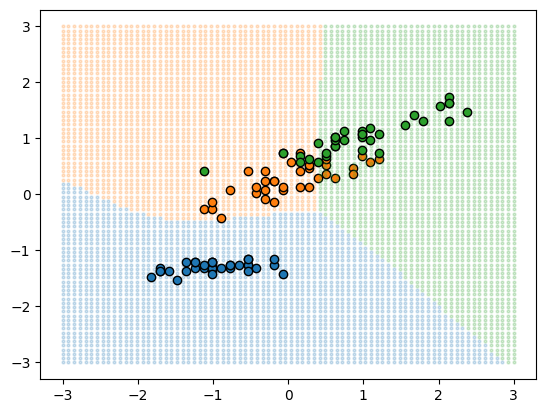

Epoch 600, Training Loss: 0.45100517584327043


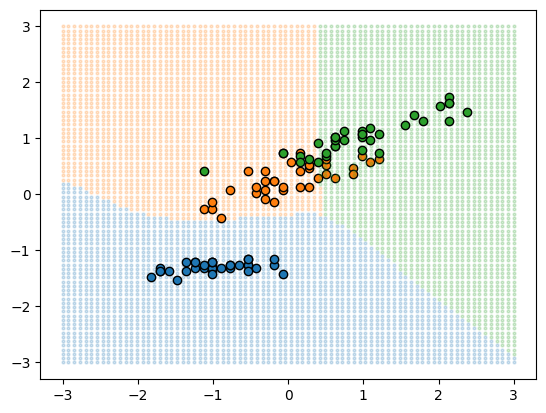

Epoch 700, Training Loss: 0.4345178421278101


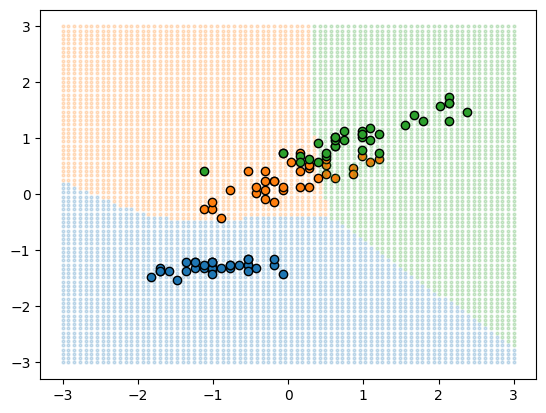

Epoch 800, Training Loss: 0.42083969181272135


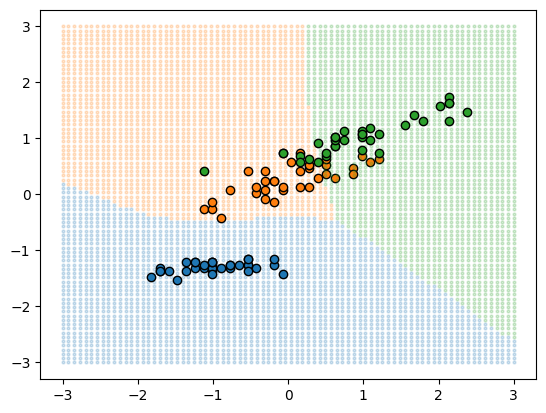

Epoch 900, Training Loss: 0.4091556613532508


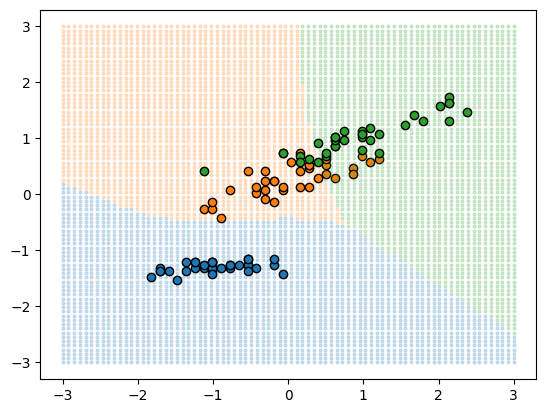

Epoch 1000, Training Loss: 0.39894775730609555


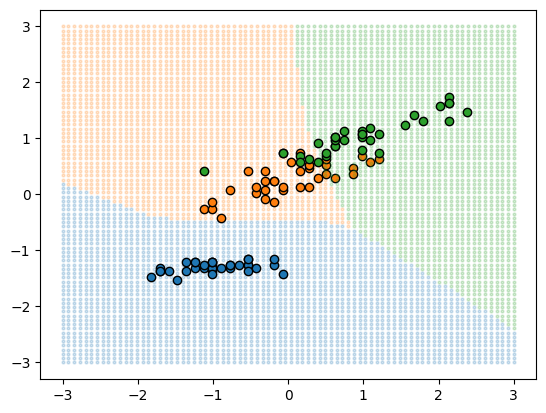

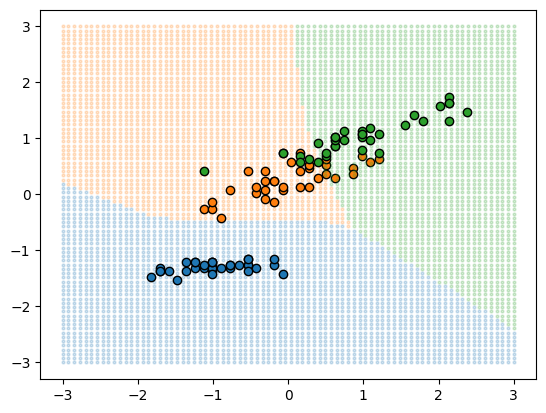

In [ ]:
#2nd Trial
# Define your input, target, and parameters
input_size = 2
hidden_size = 20
output_size = 3
learning_rate = 0.0001
epochs = 1000

# Create an instance of BinaryClassifierMLP
mlp = MulticlassMLP(input_size, hidden_size, output_size)

# Train the binary classifier
mlp.train(X_train_scaled, y_train, epochs, learning_rate)

mlp.plot_decision(X_train_scaled, y_train)

#### 2nd Trial Metric

In [ ]:
y_train_pred = np.zeros(y_train.shape)
conf_matrix_train = np.zeros((np.max(y_train)+1,np.max(y_train)+1))
for i in range(len(y_train)):
    y_train_pred[i] = mlp.predict(X_train_scaled[i,:])
    conf_matrix_train[int(y_train_pred[i]),int(y_train[i])] += 1

print("Confusion Matrix Training (Predicted vs. Actual)")
print(conf_matrix_train)

acc_train = np.trace(conf_matrix_train)/len(X_train_scaled)
print(f'Training Accuracy: {acc_train}')

print("==="*1000)

y_test_pred = np.zeros(y_test.shape)
conf_matrix_test = np.zeros((np.max(y_test)+1,np.max(y_test)+1))
for i in range(len(y_test)):
    y_test_pred[i] = mlp.predict(X_test_scaled[i,:])
    conf_matrix_test[int(y_test_pred[i]),int(y_test[i])] += 1

print("Confusion Matrix Testing (Predicted vs. Actual)")
print(conf_matrix_test)

acc_test = np.trace(conf_matrix_test)/len(X_test_scaled)
print(f'Testing Accuracy: {acc_test}')

Confusion Matrix Training (Predicted vs. Actual)
[[35.  0.  0.]
 [ 0. 26.  7.]
 [ 0.  9. 28.]]
Training Accuracy: 0.8476190476190476
Confusion Matrix Testing (Predicted vs. Actual)
[[15.  0.  0.]
 [ 0. 10.  5.]
 [ 0.  5. 10.]]
Testing Accuracy: 0.7777777777777778


### 3rd Trial

Epoch 1, Training Loss: 1.3396192482507605


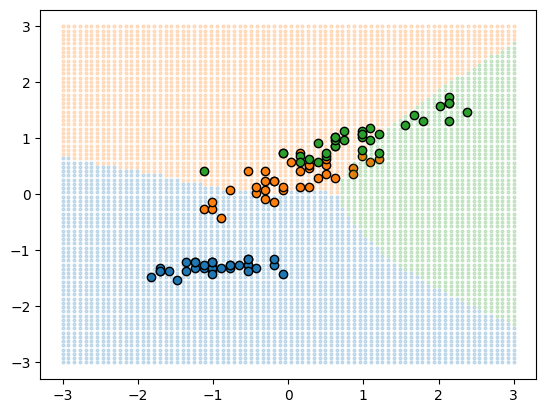

Epoch 100, Training Loss: 0.1664208919649083


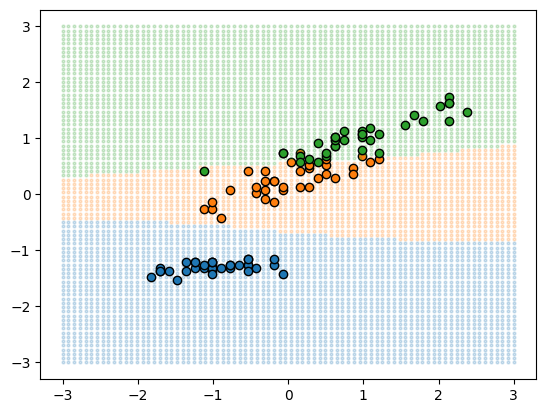

Epoch 200, Training Loss: 0.12629334258931987


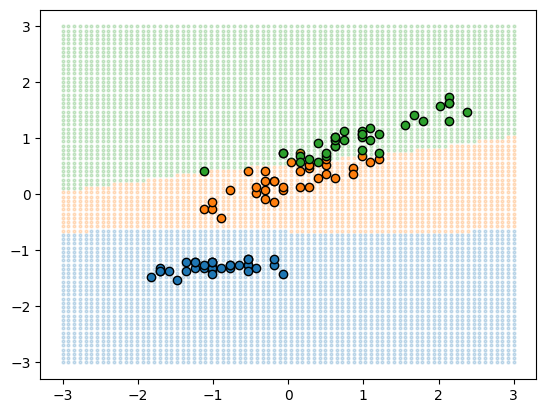

Epoch 300, Training Loss: 0.11456019991833248


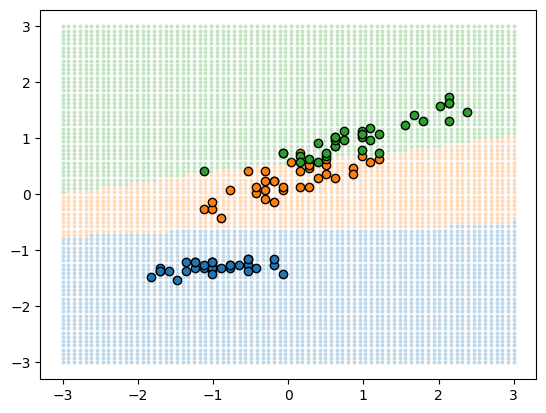

Epoch 400, Training Loss: 0.10922715004007738


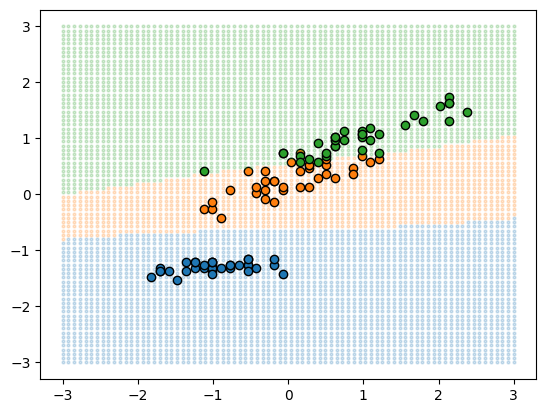

Epoch 500, Training Loss: 0.10618437849242818


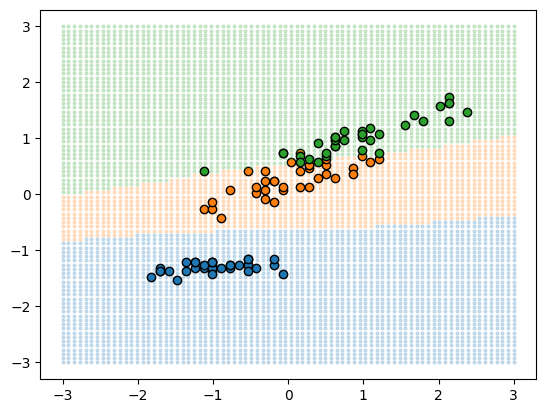

Epoch 600, Training Loss: 0.10418865531695597


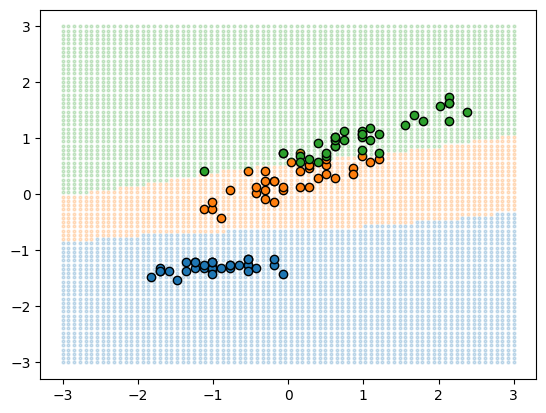

Epoch 700, Training Loss: 0.10275581663692417


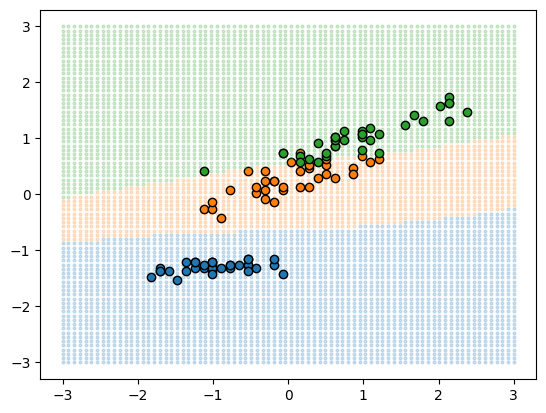

Epoch 800, Training Loss: 0.10166314270631821


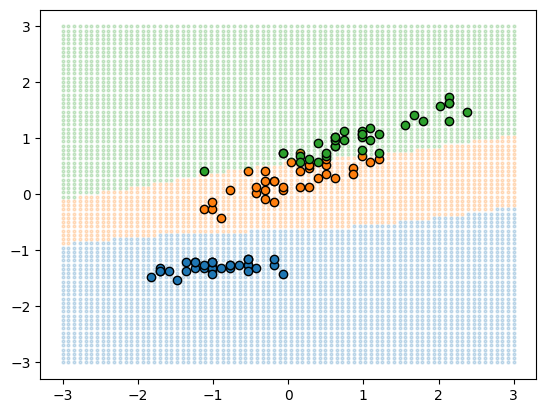

Epoch 900, Training Loss: 0.1007928891353706


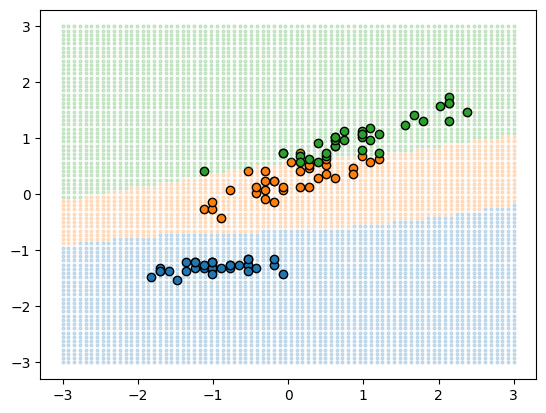

Epoch 1000, Training Loss: 0.10007456701122051


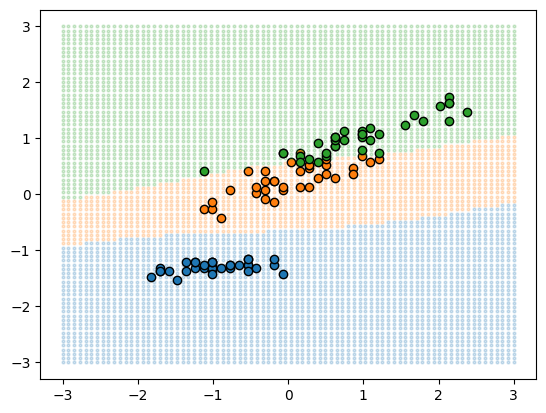

Epoch 1100, Training Loss: 0.09946173110351746


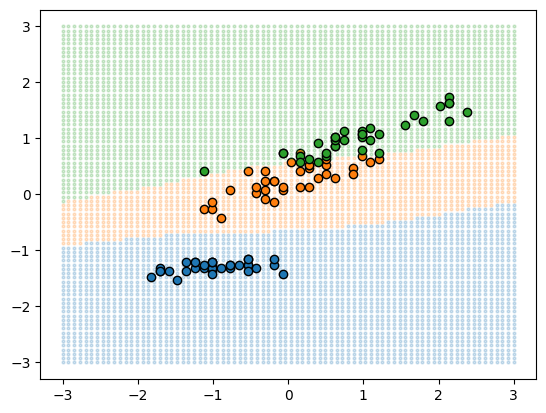

Epoch 1200, Training Loss: 0.09892203018108317


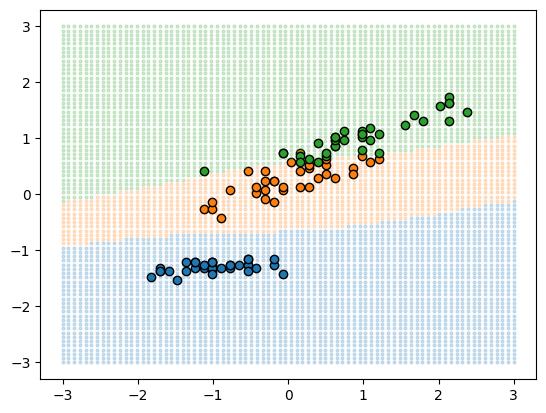

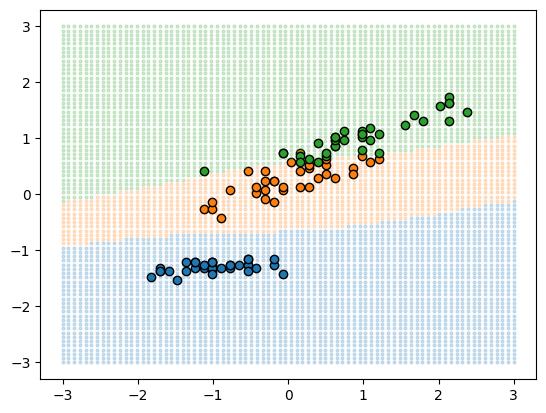

In [ ]:
#3rd Trial
# Define your input, target, and parameters
input_size = 2
hidden_size = 22
output_size = 3
learning_rate = 0.01
epochs = 1200

# Create an instance of BinaryClassifierMLP
mlp = MulticlassMLP(input_size, hidden_size, output_size)

# Train the binary classifier
mlp.train(X_train_scaled, y_train, epochs, learning_rate)

mlp.plot_decision(X_train_scaled, y_train)

#### 3rd Trial Metric

In [ ]:
y_train_pred = np.zeros(y_train.shape)
conf_matrix_train = np.zeros((np.max(y_train)+1,np.max(y_train)+1))
for i in range(len(y_train)):
    y_train_pred[i] = mlp.predict(X_train_scaled[i,:])
    conf_matrix_train[int(y_train_pred[i]),int(y_train[i])] += 1

print("Confusion Matrix Training (Predicted vs. Actual)")
print(conf_matrix_train)

acc_train = np.trace(conf_matrix_train)/len(X_train_scaled)
print(f'Training Accuracy: {acc_train}')

print("==="*1000)

y_test_pred = np.zeros(y_test.shape)
conf_matrix_test = np.zeros((np.max(y_test)+1,np.max(y_test)+1))
for i in range(len(y_test)):
    y_test_pred[i] = mlp.predict(X_test_scaled[i,:])
    conf_matrix_test[int(y_test_pred[i]),int(y_test[i])] += 1

print("Confusion Matrix Testing (Predicted vs. Actual)")
print(conf_matrix_test)

acc_test = np.trace(conf_matrix_test)/len(X_test_scaled)
print(f'Testing Accuracy: {acc_test}')

Confusion Matrix Training (Predicted vs. Actual)
[[35.  0.  0.]
 [ 0. 33.  2.]
 [ 0.  2. 33.]]
Training Accuracy: 0.9619047619047619
Confusion Matrix Testing (Predicted vs. Actual)
[[15.  0.  0.]
 [ 0. 15.  1.]
 [ 0.  0. 14.]]
Testing Accuracy: 0.9777777777777777


### 4th Trial

Epoch 1, Training Loss: 3.321779413315592


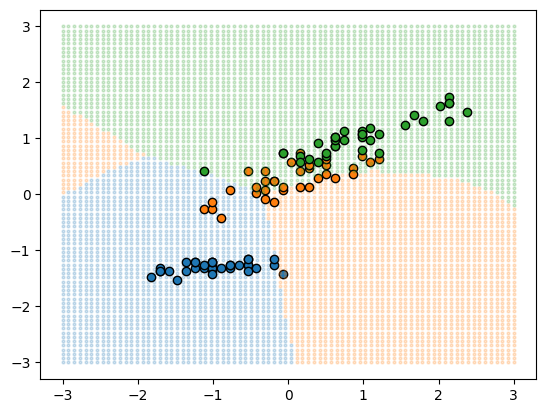

Epoch 100, Training Loss: 0.13002408049224032


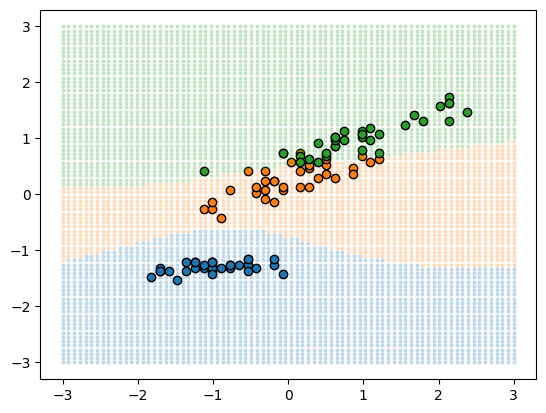

Epoch 200, Training Loss: 0.12127788738226115


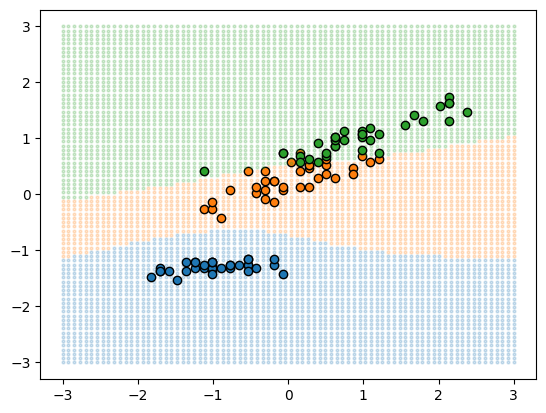

Epoch 300, Training Loss: 0.11833152576509784


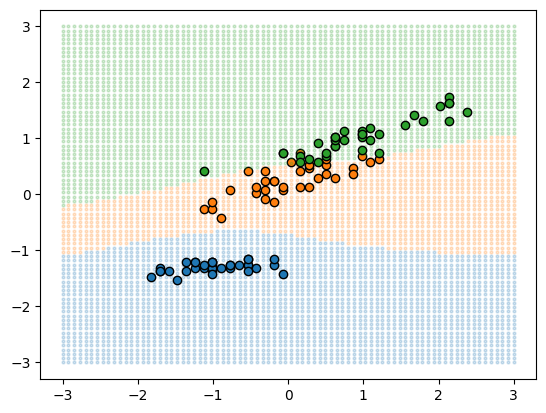

Epoch 400, Training Loss: 0.11685888093393013


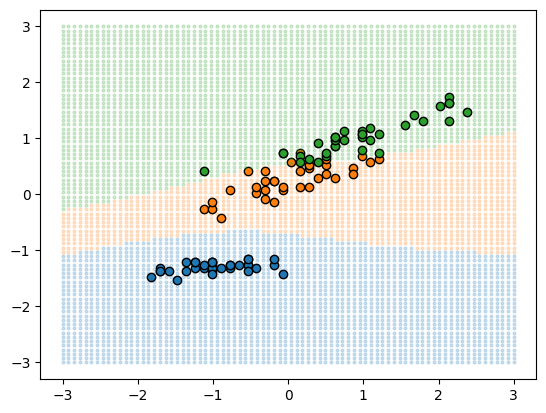

Epoch 500, Training Loss: 0.11593187413997408


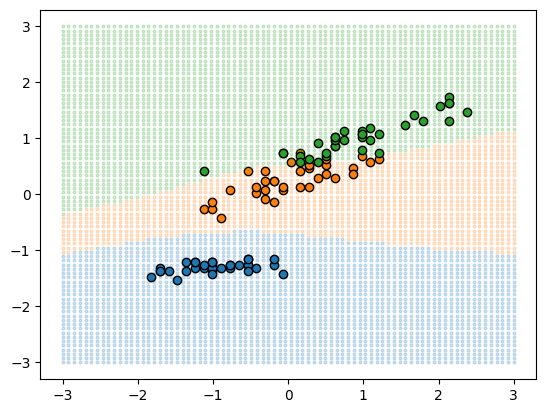

Epoch 600, Training Loss: 0.1152611120019614


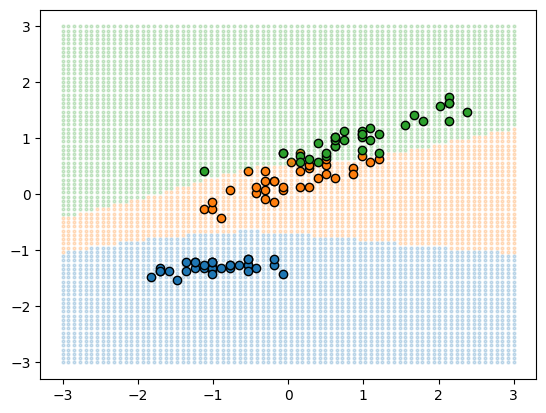

Epoch 700, Training Loss: 0.11473343284078148


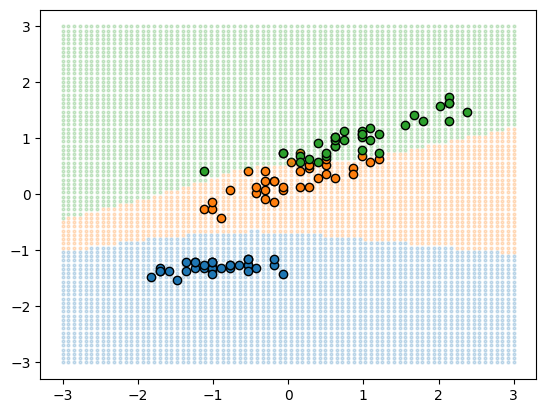

Epoch 800, Training Loss: 0.11429494932079669


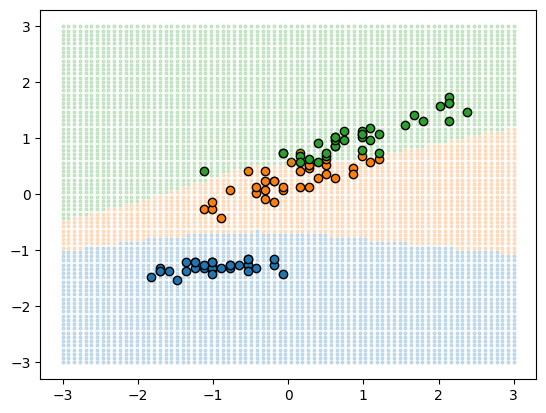

Epoch 900, Training Loss: 0.11391516737021119


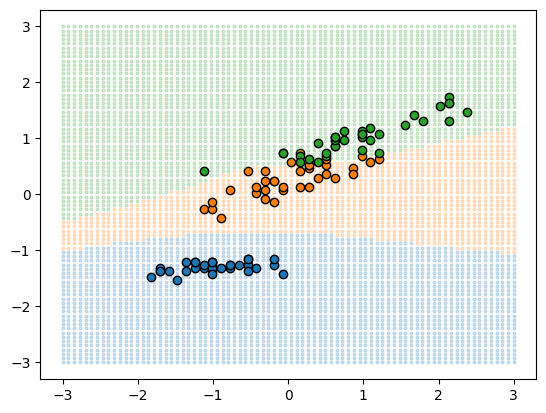

Epoch 1000, Training Loss: 0.11357460936033659


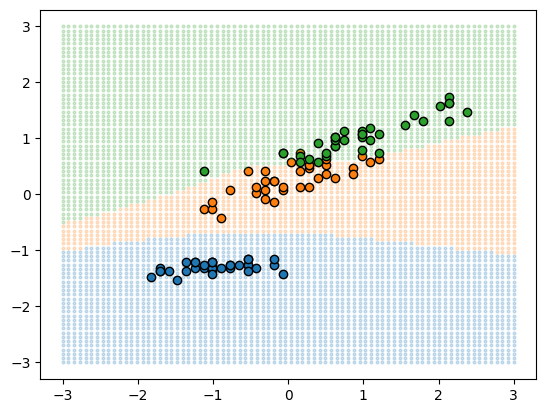

Epoch 1100, Training Loss: 0.11326005303683688


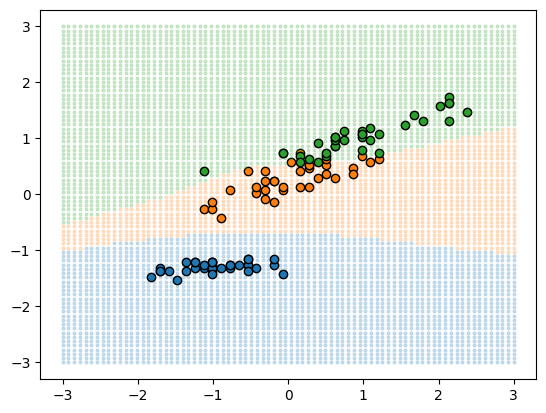

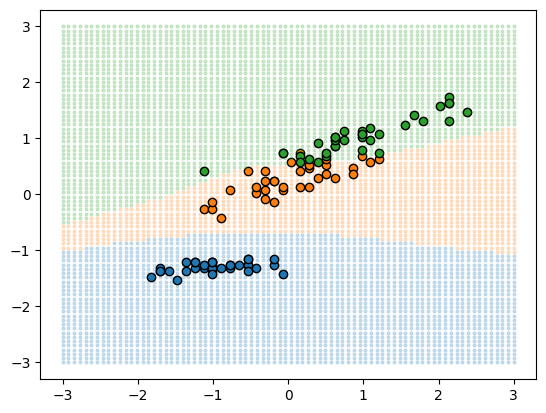

In [ ]:
#4th Trial
# Define your input, target, and parameters
input_size = 2
hidden_size = 200
output_size = 3
learning_rate = 0.01
epochs = 1100

# Create an instance of BinaryClassifierMLP
mlp = MulticlassMLP(input_size, hidden_size, output_size)

# Train the binary classifier
mlp.train(X_train_scaled, y_train, epochs, learning_rate)

mlp.plot_decision(X_train_scaled, y_train)

#### 4th Trial Metric

In [ ]:
y_train_pred = np.zeros(y_train.shape)
conf_matrix_train = np.zeros((np.max(y_train)+1,np.max(y_train)+1))
for i in range(len(y_train)):
    y_train_pred[i] = mlp.predict(X_train_scaled[i,:])
    conf_matrix_train[int(y_train_pred[i]),int(y_train[i])] += 1

print("Confusion Matrix Training (Predicted vs. Actual)")
print(conf_matrix_train)

acc_train = np.trace(conf_matrix_train)/len(X_train_scaled)
print(f'Training Accuracy: {acc_train}')

print("==="*1000)

y_test_pred = np.zeros(y_test.shape)
conf_matrix_test = np.zeros((np.max(y_test)+1,np.max(y_test)+1))
for i in range(len(y_test)):
    y_test_pred[i] = mlp.predict(X_test_scaled[i,:])
    conf_matrix_test[int(y_test_pred[i]),int(y_test[i])] += 1

print("Confusion Matrix Testing (Predicted vs. Actual)")
print(conf_matrix_test)

acc_test = np.trace(conf_matrix_test)/len(X_test_scaled)
print(f'Testing Accuracy: {acc_test}')

Confusion Matrix Training (Predicted vs. Actual)
[[35.  0.  0.]
 [ 0. 31.  0.]
 [ 0.  4. 35.]]
Training Accuracy: 0.9619047619047619
Confusion Matrix Testing (Predicted vs. Actual)
[[15.  0.  0.]
 [ 0. 15.  0.]
 [ 0.  0. 15.]]
Testing Accuracy: 1.0


### 5th Trial

Epoch 1, Training Loss: 1.35677359381917


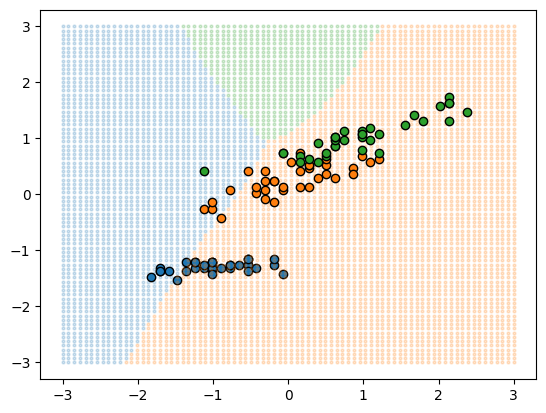

Epoch 100, Training Loss: 0.37847437779652926


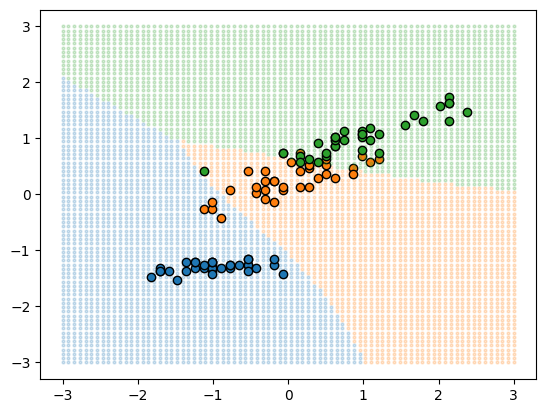

Epoch 200, Training Loss: 0.3079732810130471


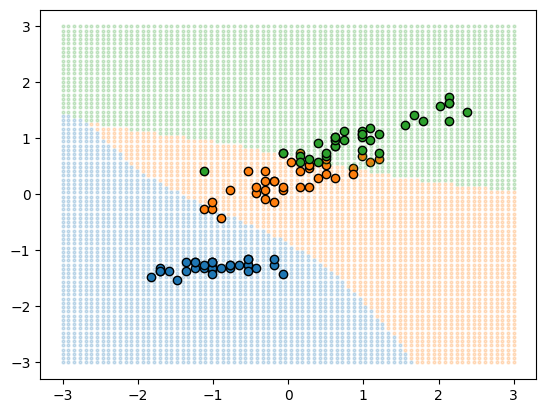

Epoch 300, Training Loss: 0.27254353341931103


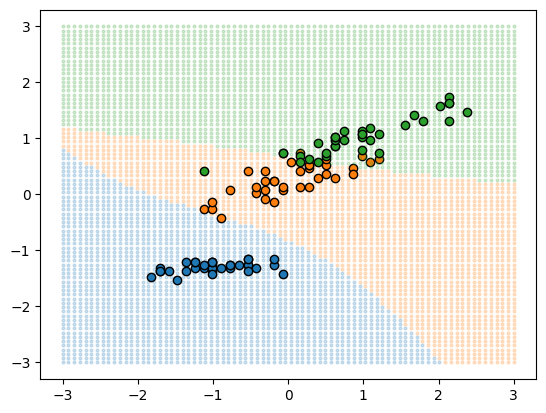

Epoch 400, Training Loss: 0.24775157902236236


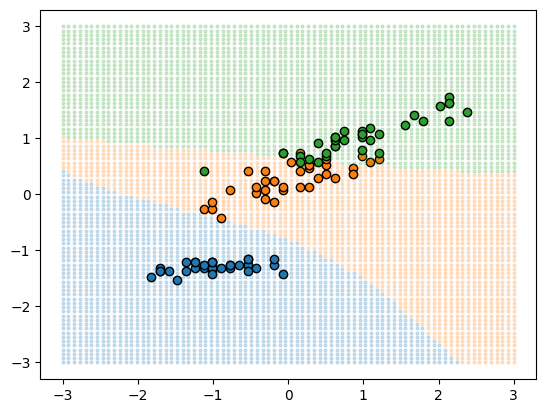

Epoch 500, Training Loss: 0.22866691195924274


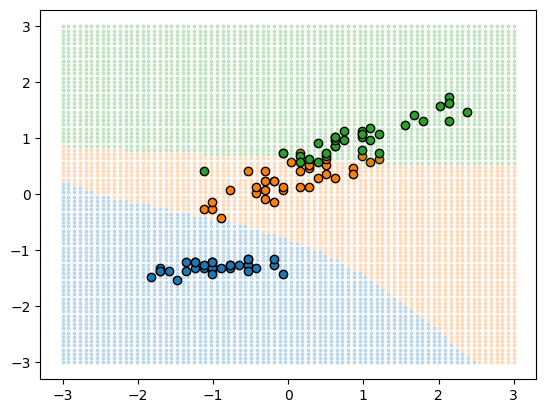

Epoch 600, Training Loss: 0.21340654182157512


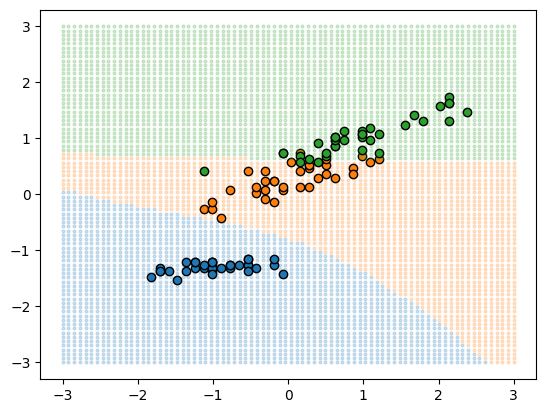

Epoch 700, Training Loss: 0.20093421795242492


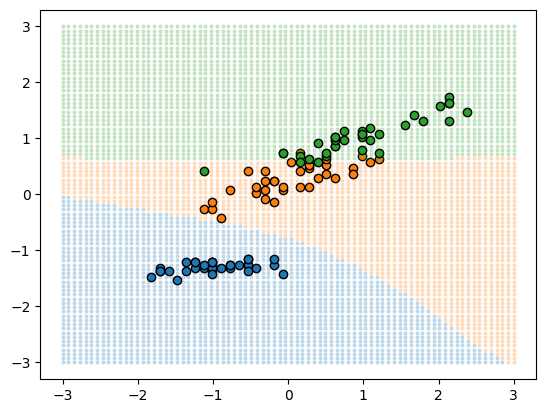

Epoch 800, Training Loss: 0.19057595211320924


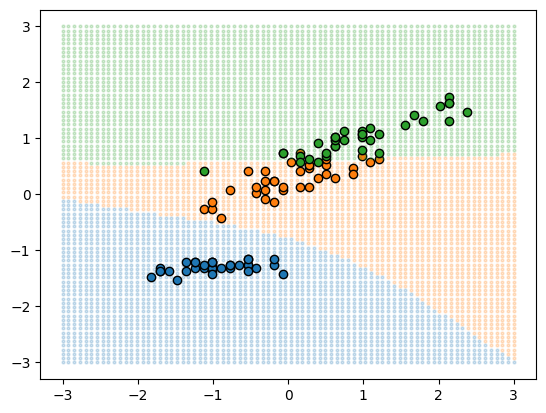

Epoch 900, Training Loss: 0.18185965992784456


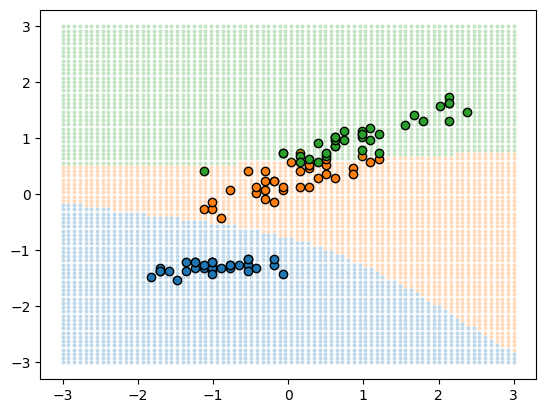

Epoch 1000, Training Loss: 0.1744416995060432


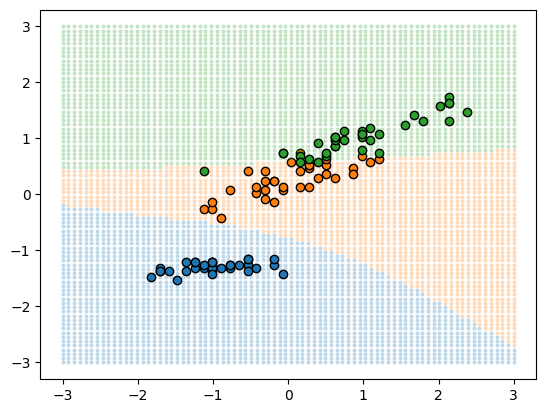

Epoch 1100, Training Loss: 0.16806564159906479


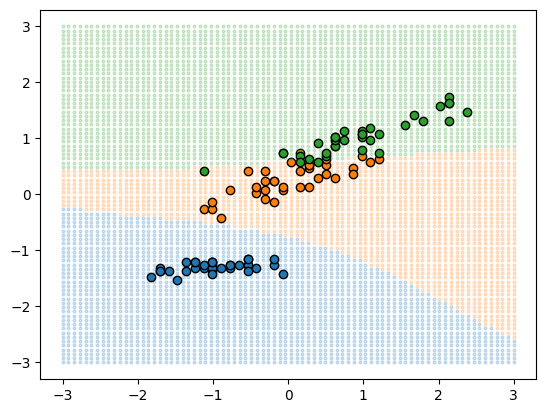

Epoch 1200, Training Loss: 0.1625364955309677


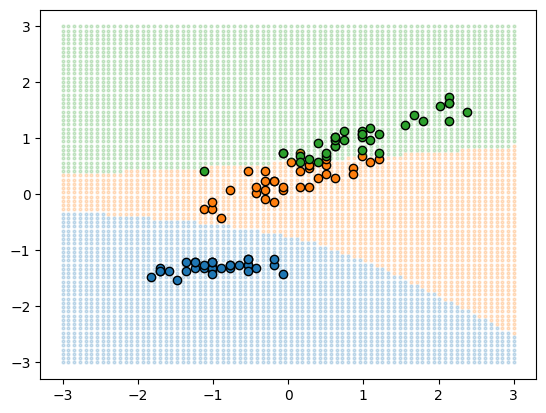

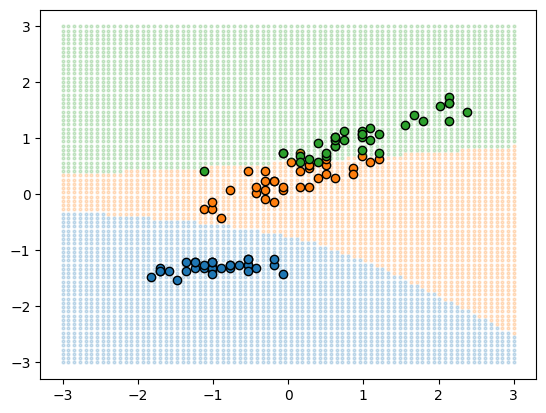

In [ ]:
#5th Trial
# Define your input, target, and parameters
input_size = 2
hidden_size = 60
output_size = 3
learning_rate = 0.0005
epochs = 1200

# Create an instance of BinaryClassifierMLP
mlp = MulticlassMLP(input_size, hidden_size, output_size)

# Train the binary classifier
mlp.train(X_train_scaled, y_train, epochs, learning_rate)

mlp.plot_decision(X_train_scaled, y_train)

#### 5th Trial Metric

In [ ]:
y_train_pred = np.zeros(y_train.shape)
conf_matrix_train = np.zeros((np.max(y_train)+1,np.max(y_train)+1))
for i in range(len(y_train)):
    y_train_pred[i] = mlp.predict(X_train_scaled[i,:])
    conf_matrix_train[int(y_train_pred[i]),int(y_train[i])] += 1

print("Confusion Matrix Training (Predicted vs. Actual)")
print(conf_matrix_train)

acc_train = np.trace(conf_matrix_train)/len(X_train_scaled)
print(f'Training Accuracy: {acc_train}')

print("==="*1000)

y_test_pred = np.zeros(y_test.shape)
conf_matrix_test = np.zeros((np.max(y_test)+1,np.max(y_test)+1))
for i in range(len(y_test)):
    y_test_pred[i] = mlp.predict(X_test_scaled[i,:])
    conf_matrix_test[int(y_test_pred[i]),int(y_test[i])] += 1

print("Confusion Matrix Testing (Predicted vs. Actual)")
print(conf_matrix_test)

acc_test = np.trace(conf_matrix_test)/len(X_test_scaled)
print(f'Testing Accuracy: {acc_test}')

Confusion Matrix Training (Predicted vs. Actual)
[[35.  0.  0.]
 [ 0. 32.  3.]
 [ 0.  3. 32.]]
Training Accuracy: 0.9428571428571428
Confusion Matrix Testing (Predicted vs. Actual)
[[15.  0.  0.]
 [ 0. 15.  0.]
 [ 0.  0. 15.]]
Testing Accuracy: 1.0
